In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into the tool

In [2]:
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 7)

Perform Below Visualizations. ● Univariate Analysis ● Bi- Variate Analysis ● Multi-Variate Analysis

<ipython-input-4-34554e522d04>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_length_mm)


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

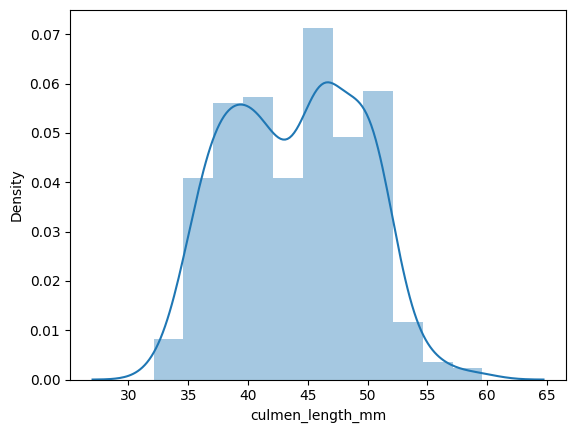

In [4]:
#Uni-variarte Analysis
sns.distplot(df.culmen_length_mm)

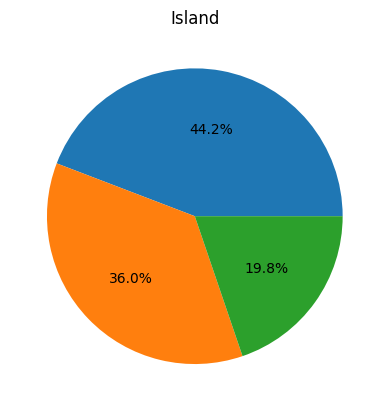

In [5]:
plt.pie(df.species.value_counts(),autopct='%1.1f%%')
plt.title('Island')
plt.show()

<Axes: ylabel='species'>

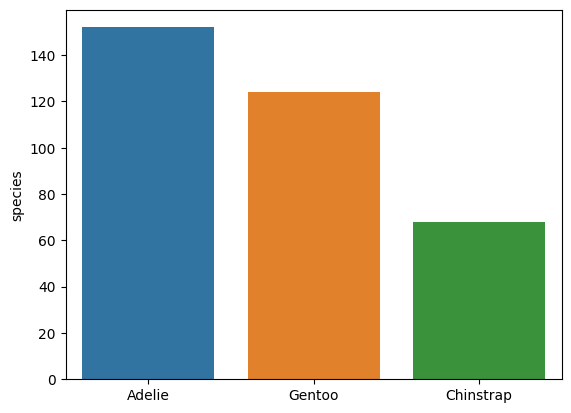

In [6]:
sns.barplot(x=df.species.value_counts().index,y=df.species.value_counts())

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

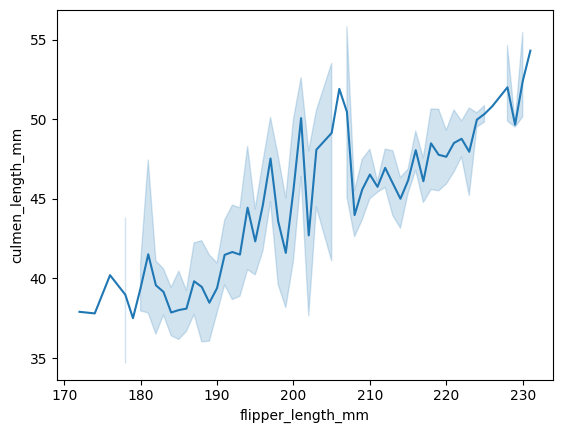

In [7]:
# Bi-variate Analyis
sns.lineplot(x=df.flipper_length_mm,y=df.culmen_length_mm)

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

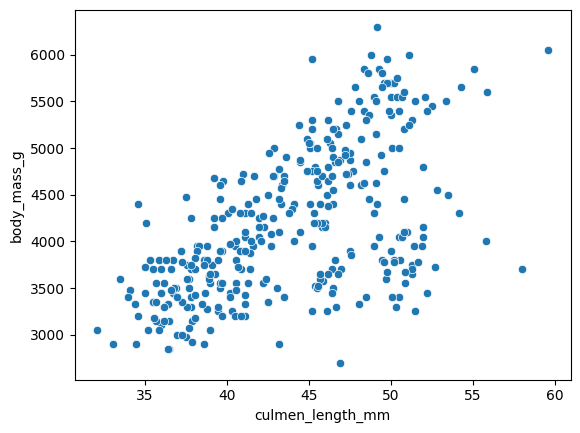

In [8]:
sns.scatterplot(x=df.culmen_length_mm	,y=df.body_mass_g)

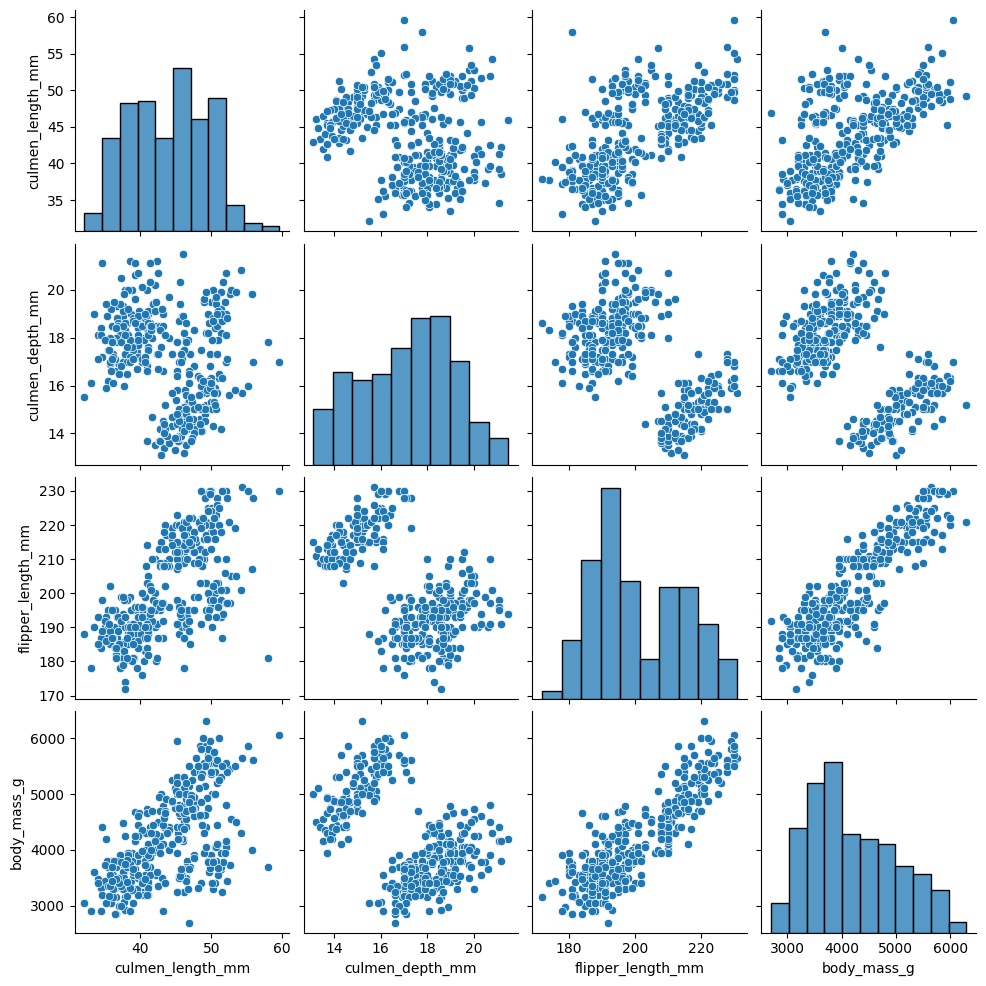

In [9]:
#Multi-variate Analysis
sns.pairplot(df)

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<ipython-input-11-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

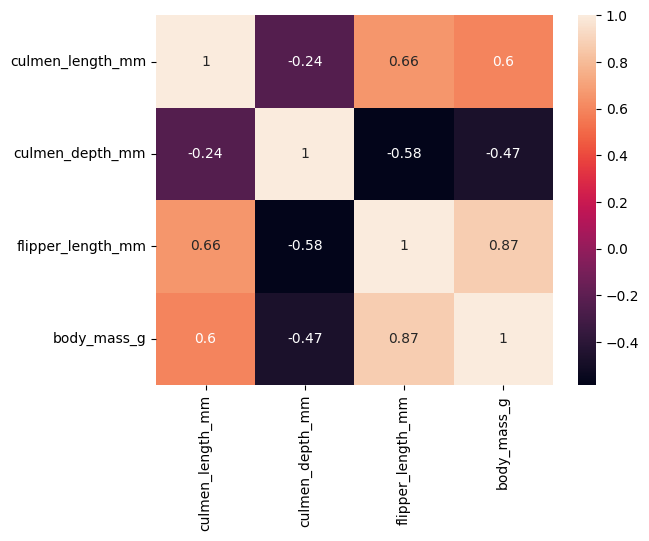

In [11]:
sns.heatmap(df.corr(),annot=True)

Perform Descriptive statistics on the dataset

In [12]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Check for Missing values and deal with them

In [13]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [14]:
most_frequent_sex = df['sex'].value_counts().idxmax()
df['sex'].fillna(most_frequent_sex, inplace=True)

In [15]:
df.culmen_length_mm = df.culmen_length_mm.fillna(df.culmen_length_mm.median())
df.culmen_depth_mm = df.culmen_depth_mm.fillna(df.culmen_depth_mm.median())
df.flipper_length_mm = df.flipper_length_mm.fillna(df.flipper_length_mm.median())
df.body_mass_g = df.body_mass_g.fillna(df.body_mass_g.median())

In [16]:
df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [17]:
df.sex.value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [18]:
df.sex = df.sex.replace(".","MALE")

Find the outliers and replace them outliers

<Axes: >

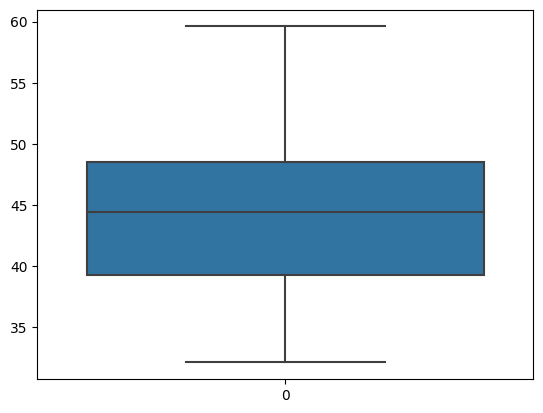

In [20]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

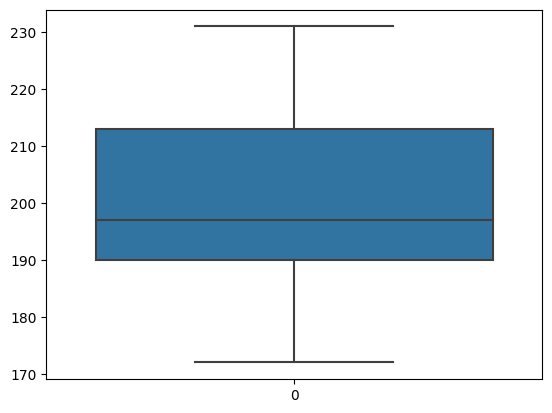

In [21]:
sns.boxplot(df.flipper_length_mm)

In [22]:
# from above boxplots we can conclude that there are no outliers

Check for Categorical columns and perform encoding.

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df.species= le.fit_transform(df.species)
df.island= le.fit_transform(df.island)
df.sex= le.fit_transform(df.sex)

In [25]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


Check the correlation of independent variables with the target

In [27]:
df.corr().sex.sort_values(ascending = False)

sex                  1.000000
body_mass_g          0.407107
culmen_depth_mm      0.354791
culmen_length_mm     0.322871
flipper_length_mm    0.241941
species              0.010240
island               0.002893
Name: sex, dtype: float64

Split the data into dependent and independent variables

In [28]:
# Independent variables
x = df.drop('sex', axis=1)
x.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.10,18.7,181.0,3750.0
1,0,2,39.50,17.4,186.0,3800.0
2,0,2,40.30,18.0,195.0,3250.0
3,0,2,44.45,17.3,197.0,4050.0
4,0,2,36.70,19.3,193.0,3450.0


In [29]:
y = df['sex']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: sex, dtype: int64

Scaling the data.

In [30]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [31]:
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0.0,1.0,0.254545,0.666667,0.152542,0.291667
1,0.0,1.0,0.269091,0.511905,0.237288,0.305556
2,0.0,1.0,0.298182,0.583333,0.389831,0.152778
3,0.0,1.0,0.449091,0.500000,0.423729,0.375000
4,0.0,1.0,0.167273,0.738095,0.355932,0.208333
...,...,...,...,...,...,...
339,1.0,0.0,0.449091,0.500000,0.423729,0.375000
340,1.0,0.0,0.534545,0.142857,0.728814,0.597222
341,1.0,0.0,0.665455,0.309524,0.847458,0.847222
342,1.0,0.0,0.476364,0.202381,0.677966,0.694444


Split the data into training and testing

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [33]:
x_train.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
219,0.5,0.5,0.658182,0.666667,0.440678,0.298611
271,1.0,0.0,0.596364,0.119048,0.813559,0.722222
266,1.0,0.0,0.487273,0.095238,0.644068,0.416667
335,1.0,0.0,0.836364,0.345238,0.983051,0.875000
217,0.5,0.5,0.636364,0.607143,0.355932,0.298611


Check the training and testing data shape.

In [34]:
x_train.shape

(240, 6)

In [35]:
x_test.shape

(104, 6)